In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Environmental

In [31]:
env_df = pd.read_csv('../data/domain_2k/environmental_2k.csv')

In [32]:
env_df

Unnamed: 0                                               text  env
0              0  The balance included in-kind donations prepare...    0
1              1  Internal controls and risk management The Boar...    0
2              2  This analysis does not take into account the e...    1
3              3  Change in Chief Financial Officer and plc Boar...    0
4              4  Consideration and prioritisation of climate ri...    1
...          ...                                                ...  ...
1995         454  The types of change are similar under the two ...    1
1996        3125  • The effects of weather and natural disasters...    1
1997        3134  In future years, water consumption per employe...    1
1998         642  z Scope 1, Scope 2, and, if appropriate, Scope...    1
1999         904  To help contribute to our carbon neutrality go...    1

[2000 rows x 3 columns]

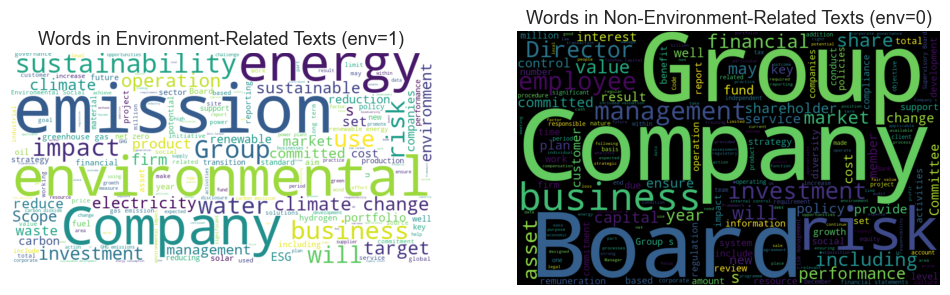

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Word cloud for SOC = 1
env_1 = " ".join(env_df[env_df["env"] == 1]["text"])
wordcloud1 = WordCloud(width=800, height=400, background_color="white").generate(env_1)

# Word cloud for SOC = 0
env_0 = " ".join(env_df[env_df["env"] == 0]["text"])
wordcloud0 = WordCloud(width=1000, height=600, background_color="black").generate(env_0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Words in Environment-Related Texts (env=1)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud0, interpolation="bilinear")
plt.axis("off")
plt.title("Words in Non-Environment-Related Texts (env=0)")

plt.show()


# Social


In [34]:
soc_df = pd.read_csv('../data/domain_2k/social_2k.csv')

In [35]:
soc_df

Unnamed: 0                                               text  soc
0              0  The balance included in-kind donations prepare...    1
1              1  Internal controls and risk management The Boar...    0
2              2  This analysis does not take into account the e...    0
3              3  Change in Chief Financial Officer and plc Boar...    0
4              4  Consideration and prioritisation of climate ri...    0
...          ...                                                ...  ...
1995         233  Performed a retrospective test over the NAV va...    0
1996          31  Risk oversees the application of the liquidity...    0
1997         210  The Board carried out a skills audit during th...    0
1998         113  Outlook Your Company’s portfolio (including ir...    0
1999          25  Lease financing is recorded at the value of am...    0

[2000 rows x 3 columns]

In [36]:
soc_df = soc_df.drop_duplicates()

In [37]:
soc_df["word_count"] = soc_df["text"].apply(lambda x: len(str(x).split()))
soc_df["char_count"] = soc_df["text"].apply(lambda x: len(str(x)))


In [38]:
soc_df.groupby("soc")["word_count"].describe()


count       mean        std  min   25%   50%   75%    max
soc                                                            
0    1196.0  28.109532  14.799261  3.0  18.0  25.0  34.0  171.0
1     804.0  25.557214  11.132306  6.0  18.0  24.0  30.0   85.0

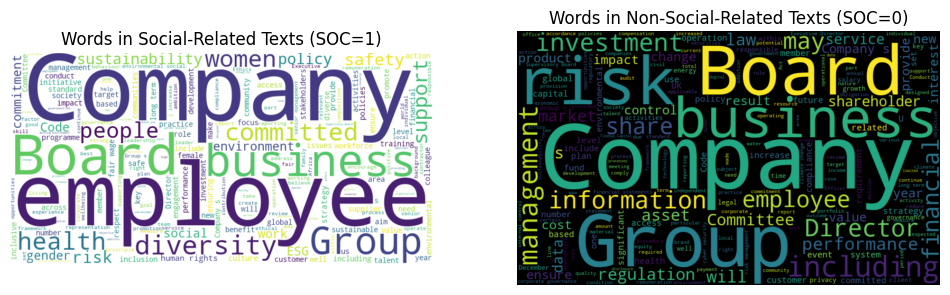

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

soc1_text = " ".join(soc_df[soc_df["soc"] == 1]["text"])
wordcloud1 = WordCloud(width=800, height=400, background_color="white").generate(soc1_text)

soc0_text = " ".join(soc_df[soc_df["soc"] == 0]["text"])
wordcloud0 = WordCloud(width=1000, height=600, background_color="black").generate(soc0_text)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Words in Social-Related Texts (SOC=1)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud0, interpolation="bilinear")
plt.axis("off")
plt.title("Words in Non-Social-Related Texts (SOC=0)")

plt.show()


In [39]:
soc_df["label"] = soc_df["soc"]

In [40]:
soc_df

Unnamed: 0                                               text  soc  \
0              0  The balance included in-kind donations prepare...    1   
1              1  Internal controls and risk management The Boar...    0   
2              2  This analysis does not take into account the e...    0   
3              3  Change in Chief Financial Officer and plc Boar...    0   
4              4  Consideration and prioritisation of climate ri...    0   
...          ...                                                ...  ...   
1995         233  Performed a retrospective test over the NAV va...    0   
1996          31  Risk oversees the application of the liquidity...    0   
1997         210  The Board carried out a skills audit during th...    0   
1998         113  Outlook Your Company’s portfolio (including ir...    0   
1999          25  Lease financing is recorded at the value of am...    0   

      word_count  char_count  label  
0             11          83      1  
1             50         337      0  
2             20         124      0  
3             51         310      0  
4             26         180      0  
...          ...         ...    ...  
1995          39         248      0  
1996          21         132      0  
1997          25         138      0  
1998          36         241      0  
1999          20         126      0  

[2000 rows x 6 columns]

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


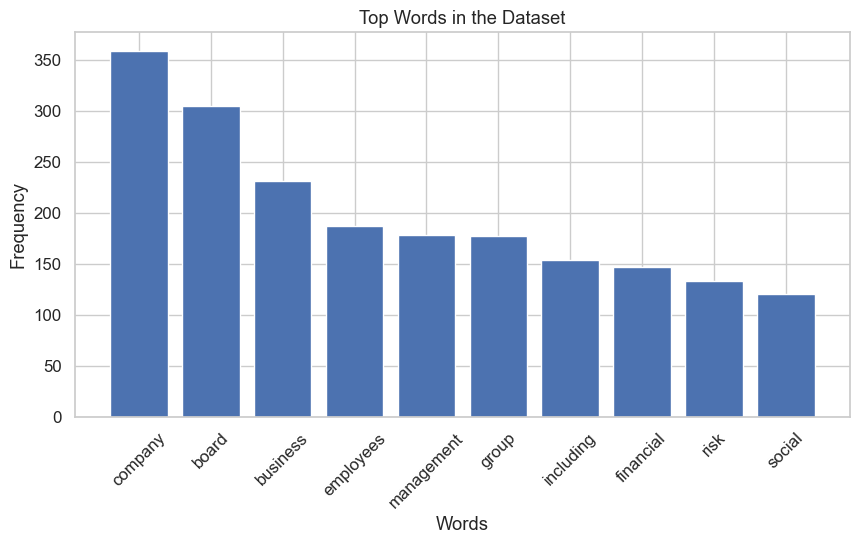

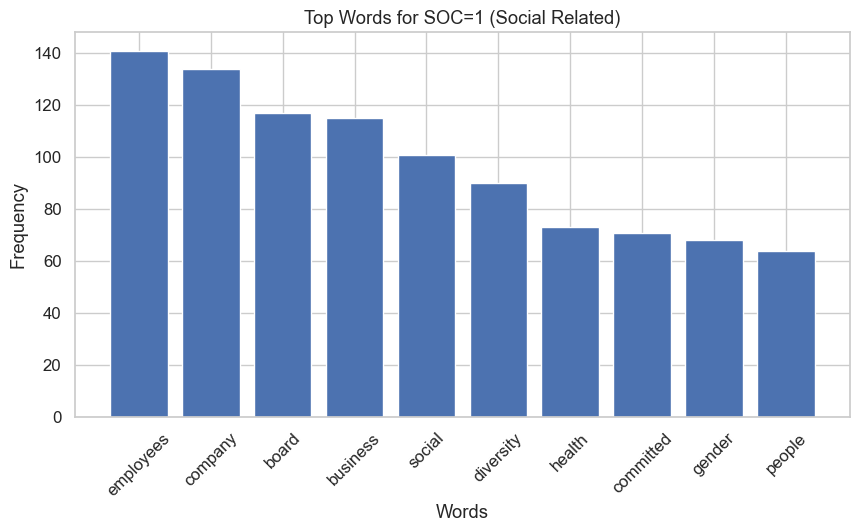

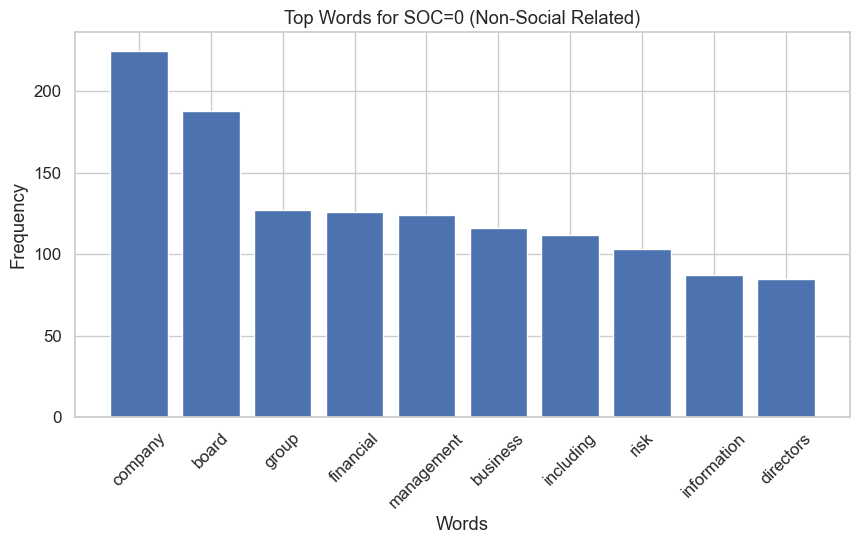

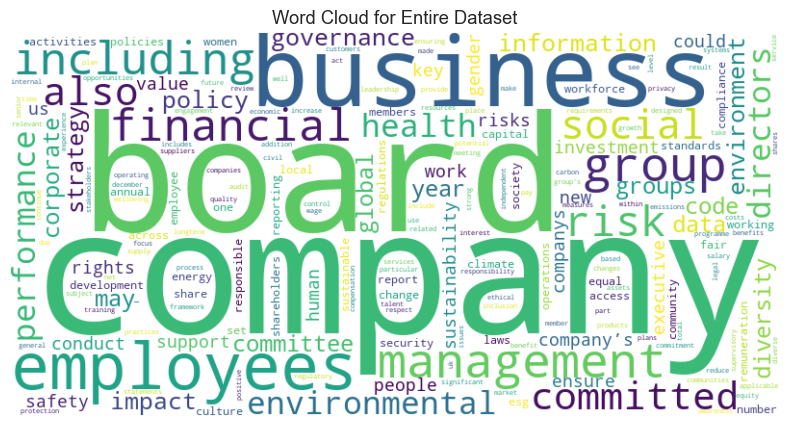

In [ ]:
import pandas as pd
import re
import string
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    """ Clean and tokenize text """
    text = text.lower()  
    text = re.sub(r'\d+', '', text)  
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    words = text.split()  
    words = [word for word in words if word not in stop_words]  
    return words


soc_df['processed_text'] = soc_df['text'].apply(preprocess_text)

all_words = [word for words in soc_df['processed_text'] for word in words]
word_freq = Counter(all_words)

def plot_word_frequencies(word_freq, title, num_words=10):
    common_words = word_freq.most_common(num_words)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(word_freq, "Top Words in the Dataset")

words_soc_1 = [word for words in soc_df[soc_df['soc'] == 1]['processed_text'] for word in words]
words_soc_0 = [word for words in soc_df[soc_df['soc'] == 0]['processed_text'] for word in words]

word_freq_soc_1 = Counter(words_soc_1)
word_freq_soc_0 = Counter(words_soc_0)

plot_word_frequencies(word_freq_soc_1, "Top Words for SOC=1 (Social Related)")
plot_word_frequencies(word_freq_soc_0, "Top Words for SOC=0 (Non-Social Related)")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Entire Dataset")
plt.show()


In [42]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words="english", max_features=20)
bow_matrix = vectorizer.fit_transform(soc_df["text"])

ngram_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

import pandas as pd

ngram_df.to_csv("top_ngrams.csv", index=False)

from IPython.display import display
display(ngram_df)


board  business  committed  company  directors  employees  environment  \
0         0         0          0        0          0          0            0   
1         1         0          0        1          0          0            0   
2         0         0          0        0          0          0            0   
3         2         1          0        0          0          0            0   
4         1         0          0        0          0          0            0   
...     ...       ...        ...      ...        ...        ...          ...   
1995      0         0          0        0          0          0            0   
1996      1         0          0        0          0          0            0   
1997      2         0          0        0          0          0            0   
1998      0         0          0        1          0          0            0   
1999      0         0          0        0          0          0            0   

      environmental  financial  governance  group  health  impact  including  \
0                 0          0           0      0       0       0          0   
1                 0          0           0      0       0       0          0   
2                 0          0           0      0       0       0          0   
3                 0          1           0      0       0       0          0   
4                 0          0           1      0       0       0          0   
...             ...        ...         ...    ...     ...     ...        ...   
1995              0          1           0      0       0       0          0   
1996              0          0           0      0       0       0          0   
1997              0          0           0      0       0       0          0   
1998              0          0           0      0       0       0          1   
1999              0          0           0      0       0       0          0   

      information  management  performance  policy  risk  social  
0               0           0            0       0     0       0  
1               0           1            0       0     1       0  
2               0           0            0       0     0       0  
3               0           0            0       0     0       0  
4               0           0            0       0     2       0  
...           ...         ...          ...     ...   ...     ...  
1995            0           0            0       0     0       0  
1996            0           0            0       0     3       0  
1997            0           0            0       0     0       0  
1998            0           0            0       0     0       0  
1999            0           0            0       0     0       0  

[2000 rows x 20 columns]

In [43]:
from textblob import TextBlob

soc_df["polarity"] = soc_df["text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
soc_df["subjectivity"] = soc_df["text"].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

soc_df.groupby("soc")[["polarity", "subjectivity"]].describe()


polarity                                                         \
       count      mean       std  min  25%       50%       75%  max   
soc                                                                   
0     1196.0  0.064808  0.167899 -0.8  0.0  0.000000  0.125000  1.0   
1      804.0  0.130006  0.190729 -0.5  0.0  0.068182  0.233333  1.0   

    subjectivity                                                            
           count      mean       std  min       25%     50%       75%  max  
soc                                                                         
0         1196.0  0.306563  0.252821  0.0  0.066667  0.3000  0.500000  1.0  
1          804.0  0.330597  0.261321  0.0  0.081944  0.3125  0.522348  1.0

https://huggingface.co/blog/qdrddr/what-are-embeddings-and-vector-databases


In [44]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

soc_df['embeddings'] = soc_df['text'].apply(lambda x: model.encode(x, convert_to_numpy=True))

embeddings = np.vstack(soc_df['embeddings'].values)

print("Embeddings shape:", embeddings.shape)

Embeddings shape: (2000, 384)


In [45]:
embeddings 

array([[-0.03304293,  0.04084506,  0.00705411, ..., -0.07441813,
        -0.00195023, -0.06602017],
       [-0.02829974, -0.02353827, -0.08890484, ...,  0.07395272,
         0.09562969, -0.01902767],
       [ 0.03786077,  0.04772588,  0.0105257 , ..., -0.03359834,
        -0.0305971 , -0.01356466],
       ...,
       [-0.00950678, -0.02089904, -0.04118326, ...,  0.00157358,
         0.00181495, -0.04974084],
       [ 0.06388596, -0.04975763, -0.08899615, ..., -0.08438639,
        -0.02846089,  0.01654842],
       [ 0.0075971 ,  0.03114546, -0.07782447, ..., -0.07063894,
        -0.0158703 , -0.11287718]], dtype=float32)

In [ ]:
import faiss

embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)

index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

print("Vectors in FAISS:", index.ntotal)

Vectors in FAISS: 2000


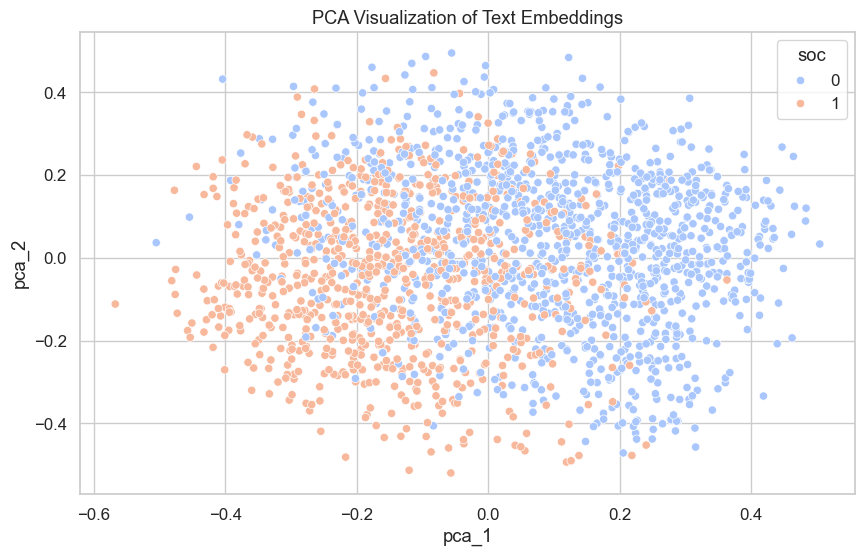

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings)

soc_df['pca_1'] = pca_result[:, 0]
soc_df['pca_2'] = pca_result[:, 1]

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca_1', y='pca_2', hue=soc_df['soc'], palette='coolwarm', data=soc_df)
plt.title("PCA Visualization of Text Embeddings")
plt.show()

Label Distribution (soc=0 vs soc=1):
     proportion
soc            
0          59.8
1          40.2


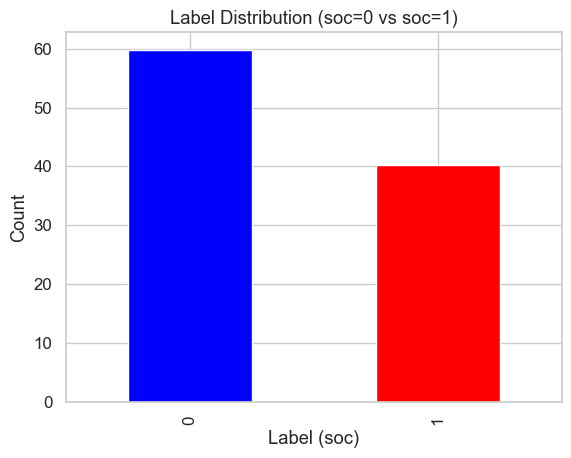

In [48]:
import pandas as pd
label_counts = soc_df['soc'].value_counts(normalize=True) * 100

print("Label Distribution (soc=0 vs soc=1):")
print(label_counts.to_frame())

import matplotlib.pyplot as plt

label_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Label Distribution (soc=0 vs soc=1)")
plt.xlabel("Label (soc)")
plt.ylabel("Count")
plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


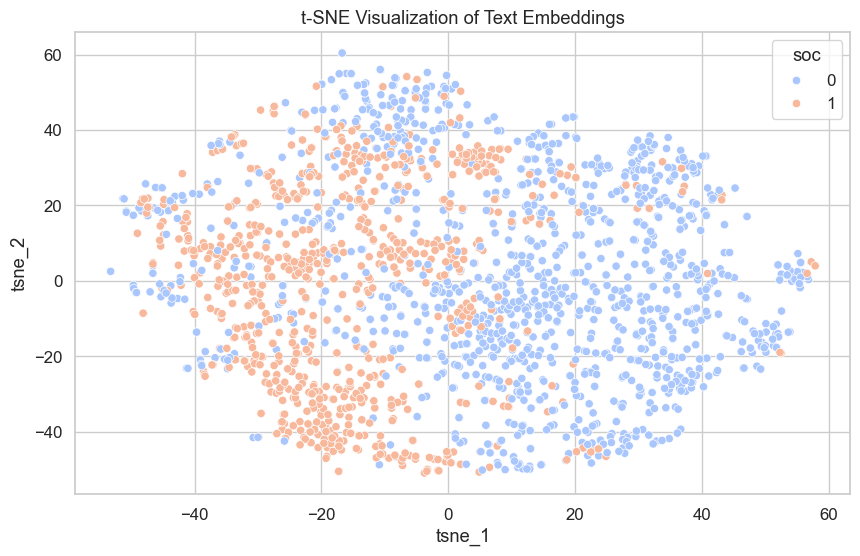

In [49]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(embeddings)

soc_df['tsne_1'] = tsne_result[:, 0]
soc_df['tsne_2'] = tsne_result[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='tsne_1', y='tsne_2', hue=soc_df['soc'], palette='coolwarm', data=soc_df)
plt.title("t-SNE Visualization of Text Embeddings")
plt.show()


# Governance 

In [50]:
gov_df = pd.read_csv('../data/domain_2k/governance_2k.csv')

In [51]:
gov_df

Unnamed: 0                                               text  gov
0              0  The balance included in-kind donations prepare...    0
1              1  Internal controls and risk management The Boar...    1
2              2  This analysis does not take into account the e...    0
3              3  Change in Chief Financial Officer and plc Boar...    0
4              4  Consideration and prioritisation of climate ri...    1
...          ...                                                ...  ...
1995         124  Total mandated AUM/NUM 1,539 10,265 11,804 Fid...    0
1996         169   Inputs other than quoted prices included wit...    0
1997         206  Swiss Life insures people and does not wish to...    0
1998         127  Romaco benefits from growth drivers in the pha...    0
1999         224  We also challenged Group management’s assumpti...    0

[2000 rows x 3 columns]

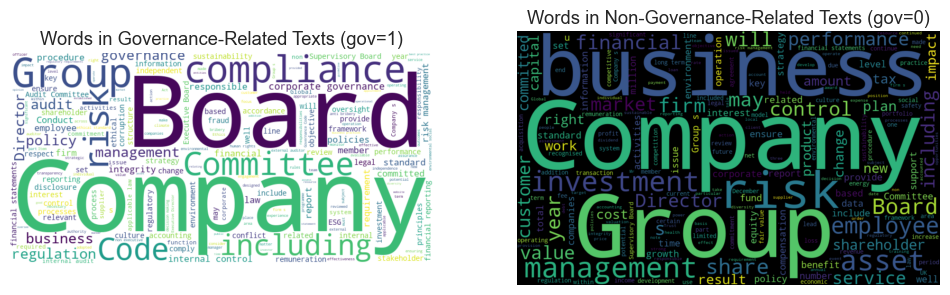

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

gov_1 = " ".join(gov_df[gov_df["gov"] == 1]["text"])
wordcloud1 = WordCloud(width=800, height=400, background_color="white").generate(gov_1)

gov_0 = " ".join(gov_df[gov_df["gov"] == 0]["text"])
wordcloud0 = WordCloud(width=1000, height=600, background_color="black").generate(gov_0)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Words in Governance-Related Texts (gov=1)")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud0, interpolation="bilinear")
plt.axis("off")
plt.title("Words in Non-Governance-Related Texts (gov=0)")

plt.show()


# Combined ESG 

In [53]:
env_2k = pd.read_csv("/Users/elizabethpan/master/data/domain_2k/environmental_2k.csv")
gov_2k = pd.read_csv("/Users/elizabethpan/master/data/domain_2k/governance_2k.csv")
soc_2k = pd.read_csv("/Users/elizabethpan/master/data/domain_2k/social_2k.csv")

In [54]:

df_combined = pd.concat([soc_2k, env_2k, gov_2k], ignore_index=True)


In [55]:
# if NAN turn into 0

df_combined = df_combined.fillna(0)

In [56]:
df_combined 

Unnamed: 0                                               text  soc  env  \
0              0  The balance included in-kind donations prepare...  1.0  0.0   
1              1  Internal controls and risk management The Boar...  0.0  0.0   
2              2  This analysis does not take into account the e...  0.0  0.0   
3              3  Change in Chief Financial Officer and plc Boar...  0.0  0.0   
4              4  Consideration and prioritisation of climate ri...  0.0  0.0   
...          ...                                                ...  ...  ...   
5995         124  Total mandated AUM/NUM 1,539 10,265 11,804 Fid...  0.0  0.0   
5996         169   Inputs other than quoted prices included wit...  0.0  0.0   
5997         206  Swiss Life insures people and does not wish to...  0.0  0.0   
5998         127  Romaco benefits from growth drivers in the pha...  0.0  0.0   
5999         224  We also challenged Group management’s assumpti...  0.0  0.0   

      gov  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
5995  0.0  
5996  0.0  
5997  0.0  
5998  0.0  
5999  0.0  

[6000 rows x 5 columns]

In [ ]:
df_combined['S'] = df_combined['soc']
df_combined.drop('soc', axis=1, inplace=True)
df_combined['G'] = df_combined['gov']
df_combined.drop('gov', axis=1, inplace=True)
df_combined['E'] = df_combined['env']
df_combined.drop('env', axis=1, inplace=True)

In [58]:
df_combined

Unnamed: 0                                               text    S    G  \
0              0  The balance included in-kind donations prepare...  1.0  0.0   
1              1  Internal controls and risk management The Boar...  0.0  0.0   
2              2  This analysis does not take into account the e...  0.0  0.0   
3              3  Change in Chief Financial Officer and plc Boar...  0.0  0.0   
4              4  Consideration and prioritisation of climate ri...  0.0  0.0   
...          ...                                                ...  ...  ...   
5995         124  Total mandated AUM/NUM 1,539 10,265 11,804 Fid...  0.0  0.0   
5996         169   Inputs other than quoted prices included wit...  0.0  0.0   
5997         206  Swiss Life insures people and does not wish to...  0.0  0.0   
5998         127  Romaco benefits from growth drivers in the pha...  0.0  0.0   
5999         224  We also challenged Group management’s assumpti...  0.0  0.0   

        E  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
...   ...  
5995  0.0  
5996  0.0  
5997  0.0  
5998  0.0  
5999  0.0  

[6000 rows x 5 columns]

In [59]:
df_cleaned = df_combined.drop(columns=['Unnamed: 0'])


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6000 non-null   object 
 1   S       6000 non-null   float64
 2   G       6000 non-null   float64
 3   E       6000 non-null   float64
dtypes: float64(3), object(1)
memory usage: 187.6+ KB


In [60]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chosen after reading the documentation for what is best for our purpose
model = SentenceTransformer('all-MiniLM-L6-v2')


sentence_embeddings = model.encode(df_cleaned['text'].tolist())

df_embeddings = pd.DataFrame(sentence_embeddings)

df_numeric = df_cleaned[['S', 'G', 'E']].reset_index(drop=True)

df_features = pd.concat([df_embeddings, df_numeric], axis=1)

df_features.columns = df_features.columns.astype(str)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(df_scaled)

df_pca_result = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_

df_pca_result.head(), explained_variance

(        PC1       PC2
 0  0.483550  1.195646
 1  5.030582 -5.717543
 2  1.757197  8.300781
 3  3.989822 -0.600106
 4 -0.822361  0.359818,
 array([0.04824207, 0.04574468]))

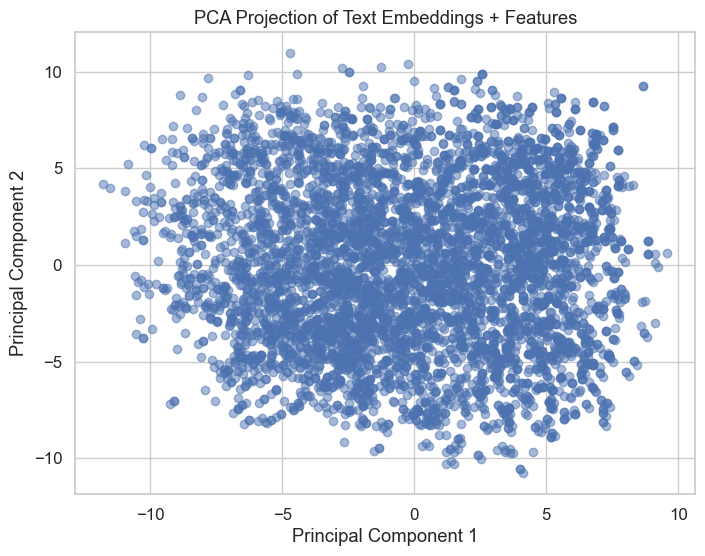

In [61]:
import matplotlib.pyplot as plt

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Text Embeddings + Features')
plt.grid(True)
plt.show()


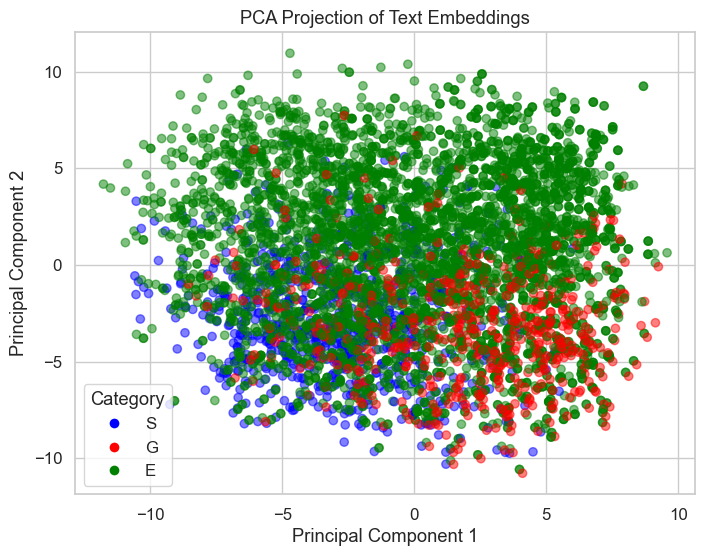

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Determine the dominant category per row
labels = df_cleaned[['E', 'S', 'G']].idxmax(axis=1)

# Define colors for each label
color_map = {'S': 'blue', 'G': 'red', 'E': 'green'}
colors = labels.map(color_map)

# Scatter plot with colors
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_result['PC1'], df_pca_result['PC2'], c=colors, alpha=0.5)

# Labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Text Embeddings')
plt.grid(True)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='S', markersize=8, markerfacecolor='blue'),
                   Line2D([0], [0], marker='o', color='w', label='G', markersize=8, markerfacecolor='red'),
                   Line2D([0], [0], marker='o', color='w', label='E', markersize=8, markerfacecolor='green')]

plt.legend(handles=legend_elements, title="Category")
plt.show()


In [ ]:
import pandas as pd 
import numpy as np
import nltk
nltk.download('punkt')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [ ]:
env_2k = pd.read_csv("/Users/elizabethpan/master/data/domain_2k/environmental_2k.csv")
gov_2k = pd.read_csv("/Users/elizabethpan/master/data/domain_2k/governance_2k.csv")
soc_2k = pd.read_csv("/Users/elizabethpan/master/data/domain_2k/social_2k.csv")

In [ ]:
# Add domain labels
env_2k['domain'] = 'Environment'
gov_2k['domain'] = 'Governance'
soc_2k['domain'] = 'Social'

# Combine datasets
df = pd.concat([env_2k, gov_2k, soc_2k], ignore_index=True)

# Calculate word count from 'text' column
df['word_count'] = df['text'].apply(lambda x: len(nltk.word_tokenize(str(x))))

# Summary stats grouped by domain
summary = df.groupby("domain")["word_count"].agg([
    ('Num. of Sentences', 'count'),
    ('Mean', 'mean'),
    ('Std', 'std'),
    ('Q1', lambda x: np.percentile(x, 25)),
    ('Q2', lambda x: np.percentile(x, 50)),
    ('Q3', lambda x: np.percentile(x, 75))
]).reset_index()

# Formatting
summary['Num. of Sentences'] = summary['Num. of Sentences'].apply(lambda x: f"{x:,}")
summary['Mean'] = summary['Mean'].round(2)
summary['Std'] = summary['Std'].round(2)

# Add total row
total_row = pd.DataFrame({
    'domain': ['Total'],
    'Num. of Sentences': [f"{df.shape[0]:,}"],
    'Mean': [""],
    'Std': [""],
    'Q1': [""],
    'Q2': [""],
    'Q3': [""]
})

# Combine
final_summary = pd.concat([summary, total_row], ignore_index=True)


# Display in terminal
print(final_summary.to_string(index=False))

     domain Num. of Sentences   Mean    Std    Q1    Q2    Q3
Environment             2,000  29.58  15.74  20.0  27.0  36.0
 Governance             2,000  29.88  15.28  20.0  27.0  36.0
     Social             2,000  30.38  15.35  20.0  27.0  36.0
      Total             6,000                                


In [ ]:
from wordcloud import WordCloud


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


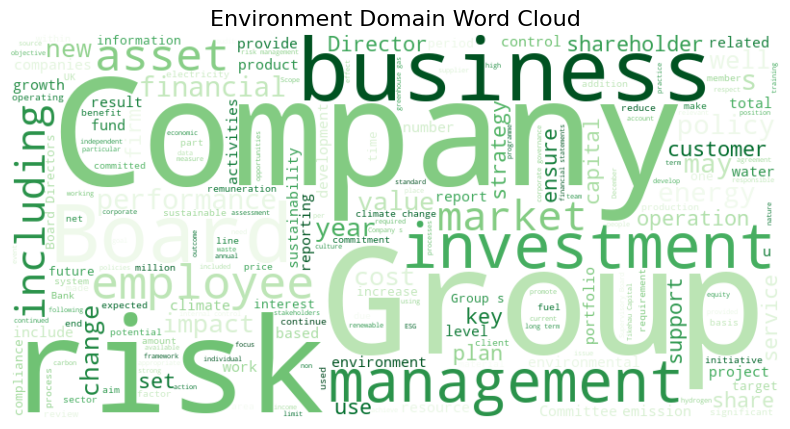

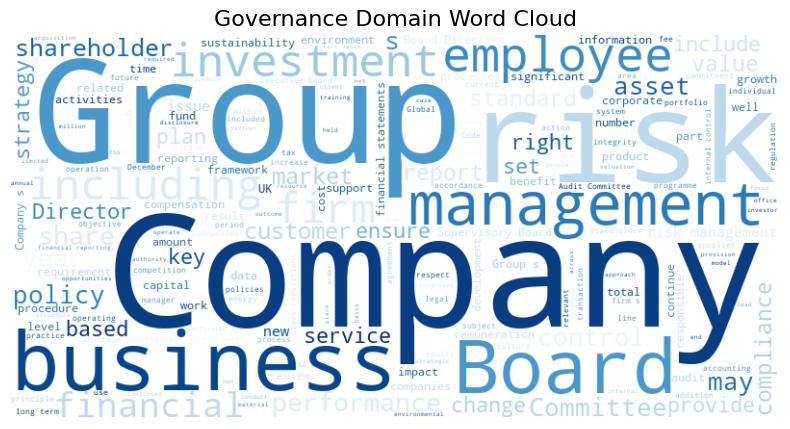

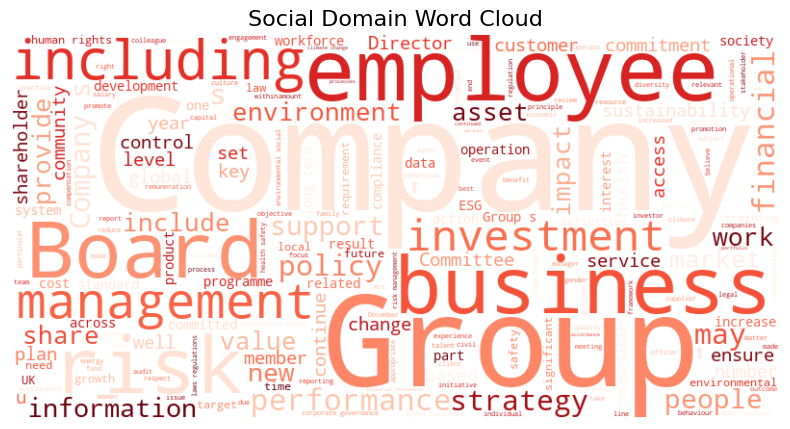

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def generate_wordcloud(text_series, title, colormap):
    all_text = " ".join(str(s) for s in text_series)
    filtered_text = " ".join(word for word in all_text.split() if word.lower() not in stop_words)

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        colormap=colormap
    ).generate(filtered_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate colored word clouds
generate_wordcloud(env_2k['text'], "Environment Domain Word Cloud", colormap='Greens')
generate_wordcloud(gov_2k['text'], "Governance Domain Word Cloud", colormap='Blues')
generate_wordcloud(soc_2k['text'], "Social Domain Word Cloud", colormap='Reds')


In [ ]:
# Load datasets
env_sentiment = pd.read_csv("/Users/elizabethpan/master/data/sentiment/env_dataset_sentiment.csv")
gov_sentiment = pd.read_csv("/Users/elizabethpan/master/data/sentiment/gov_dataset_sentiment.csv")
soc_sentiment = pd.read_csv("/Users/elizabethpan/master/data/sentiment/soc_dataset_sentiment.csv")


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


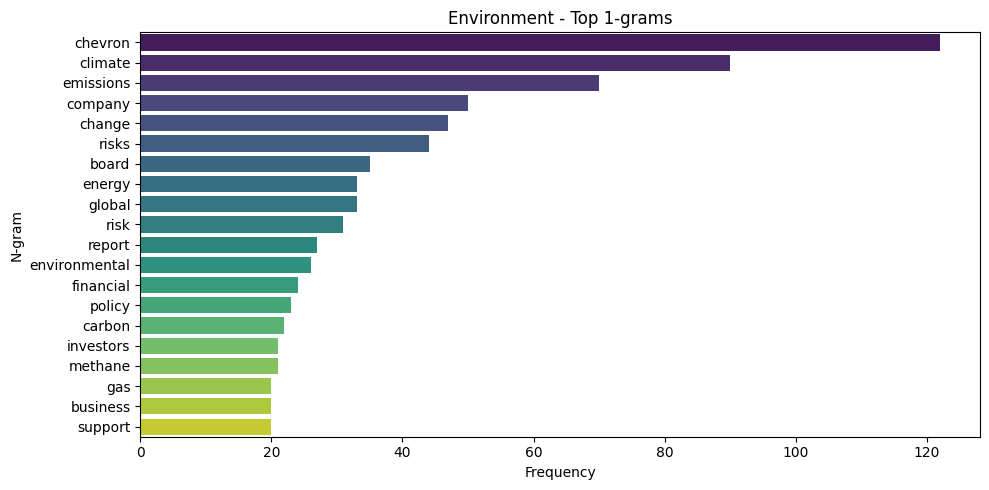

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


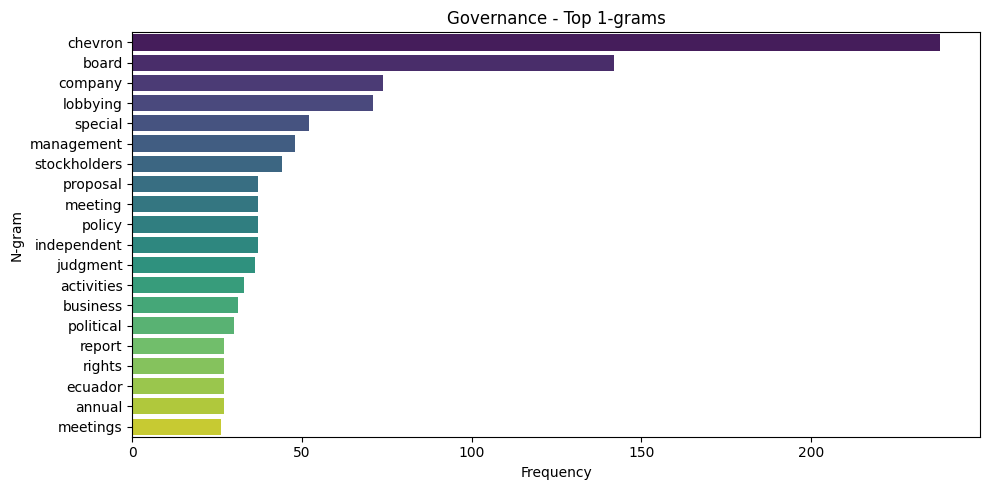

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


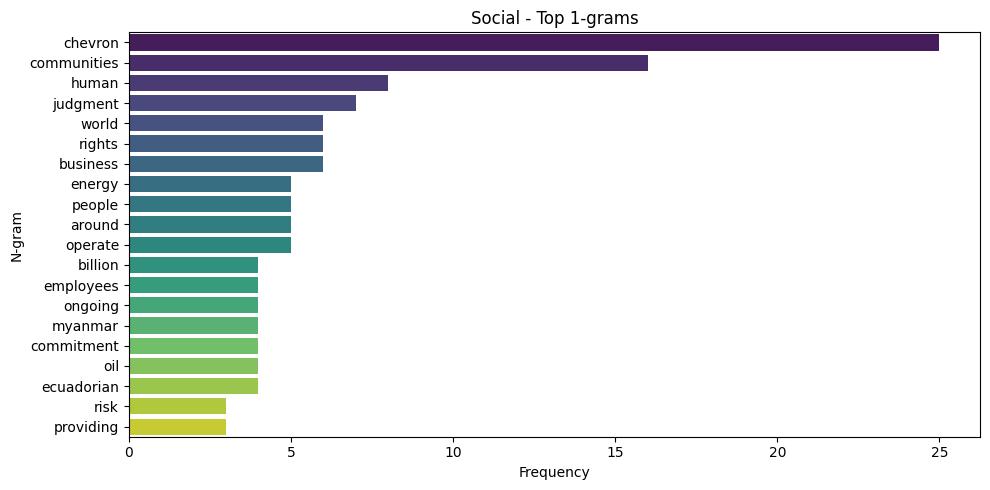

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


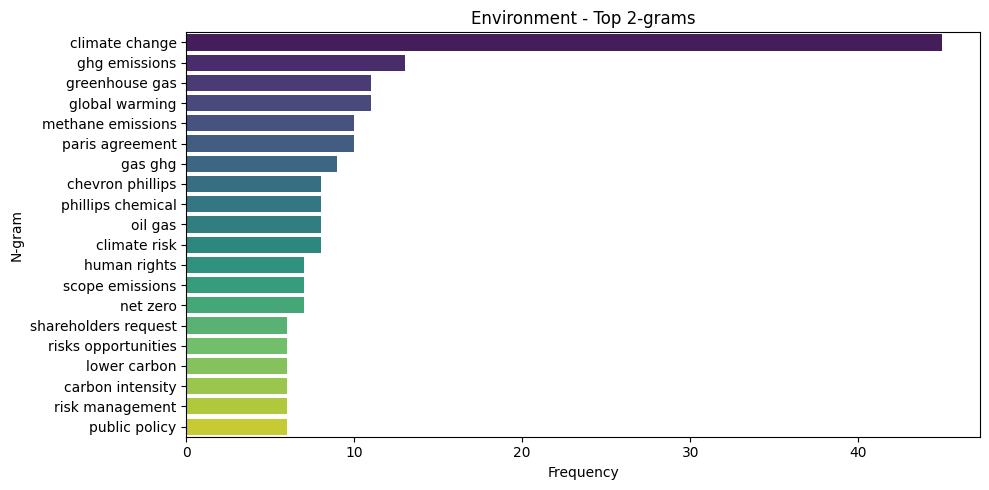

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


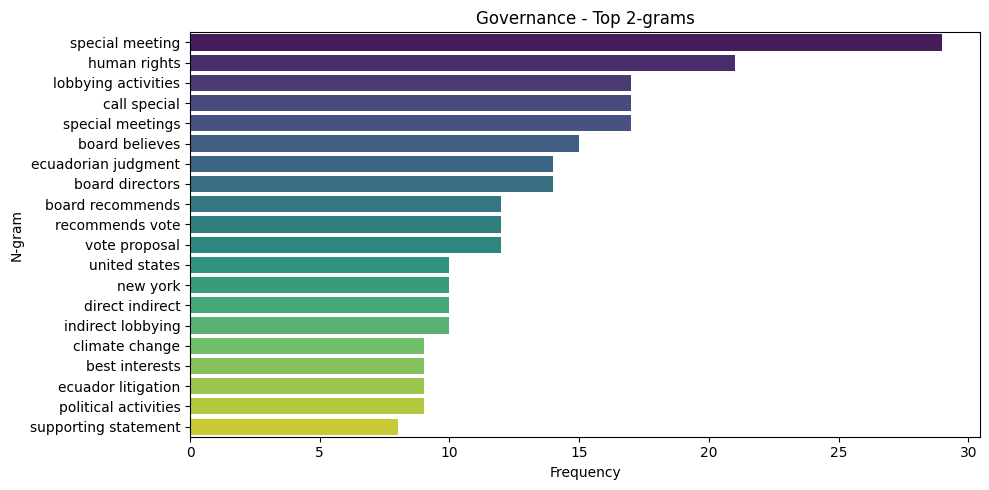

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


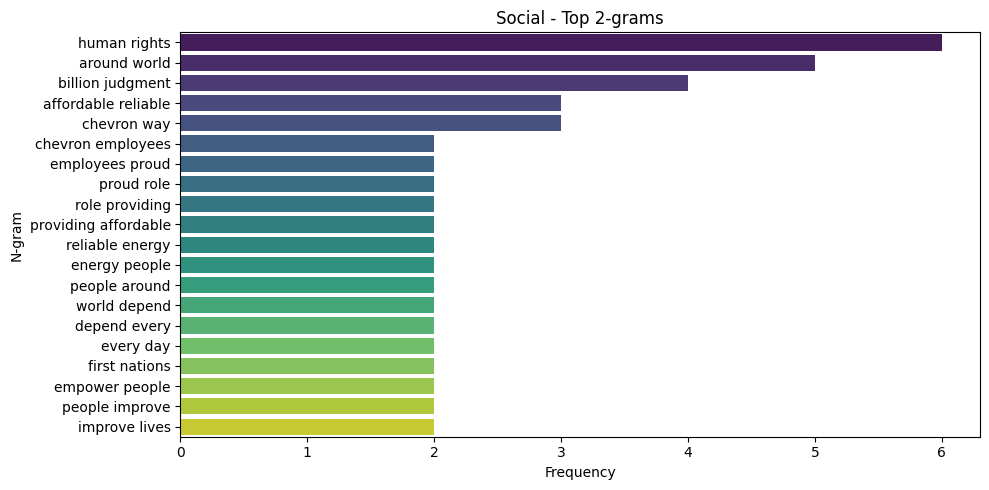

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


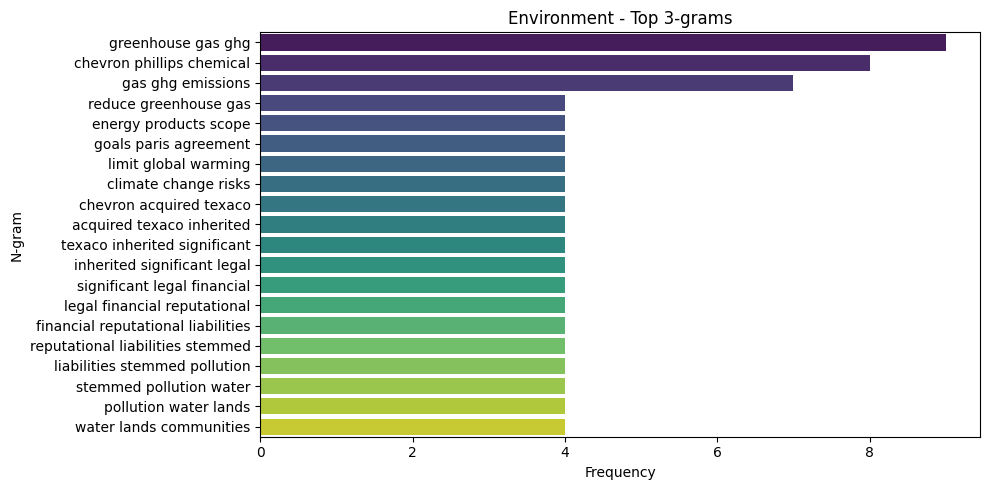

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


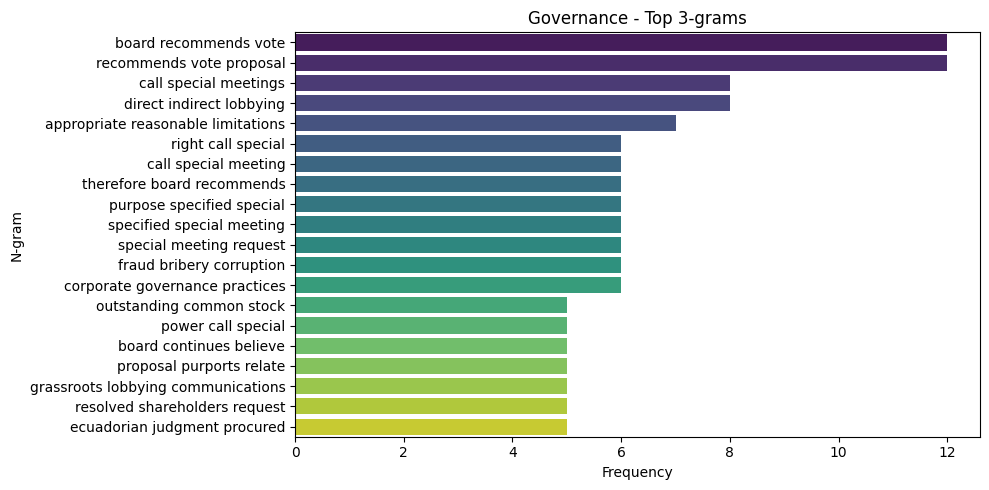

/var/folders/lk/mfvctvkx3cj4p16869xl4nmh0000gn/T/ipykernel_49003/1265384027.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngrams_text, palette="viridis")


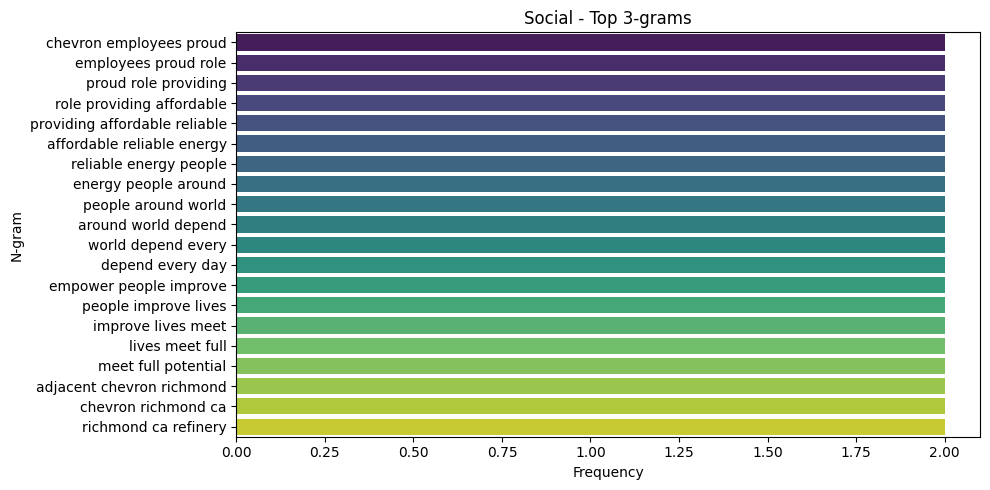

In [ ]:
import pandas as pd
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def get_top_ngrams(text_series, n=2, top_k=20):
    all_ngrams = []
    for sentence in text_series:
        tokens = [word.lower() for word in nltk.word_tokenize(str(sentence)) if word.isalpha() and word.lower() not in stop_words]
        n_grams = ngrams(tokens, n)
        all_ngrams.extend(n_grams)
    counter = Counter(all_ngrams)
    return counter.most_common(top_k)

def plot_ngrams(ngrams_freq, title):
    ngrams_text = [' '.join(gram) for gram, _ in ngrams_freq]
    counts = [count for _, count in ngrams_freq]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=counts, y=ngrams_text, palette="viridis")
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.tight_layout()
    plt.show()

for n in [1, 2, 3]:
    plot_ngrams(get_top_ngrams(env_sentiment['text'], n=n), f"Environment - Top {n}-grams")
    plot_ngrams(get_top_ngrams(gov_sentiment['text'], n=n), f"Governance - Top {n}-grams")
    plot_ngrams(get_top_ngrams(soc_sentiment['text'], n=n), f"Social - Top {n}-grams")


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/Users/elizabethpan/master/data/2k_sentiment/gov_2k_sentiment.csv")

In [ ]:
minority = df[df.gov == 1]
df = pd.concat([df, minority.sample(n=len(df[df.gov == 0]), replace=True)])


In [ ]:
df = df[df["text"].str.split().str.len() > 5]
df = df.drop_duplicates(subset="text")


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data: metric ± std_dev, split into separate values
data = {
    'Domain': ['Environmental']*3 + ['Social']*3 + ['Governance']*3,
    'Shots': [4, 8, 16]*3,
    'Accuracy': [0.8967, 0.9277, 0.9378, 0.7628, 0.8613, 0.9008, 0.6722, 0.7833, 0.8221],
    'Accuracy_std': [0.0224, 0.0086, 0.0132, 0.0222, 0.0112, 0.0146, 0.0297, 0.0205, 0.0115],
    'F1': [0.8526, 0.8964, 0.9105, 0.7095, 0.8327, 0.8798, 0.5484, 0.6738, 0.7314],
    'F1_std': [0.0229, 0.0105, 0.0150, 0.0519, 0.0134, 0.0160, 0.0158, 0.0187, 0.0162],
}

df = pd.DataFrame(data)


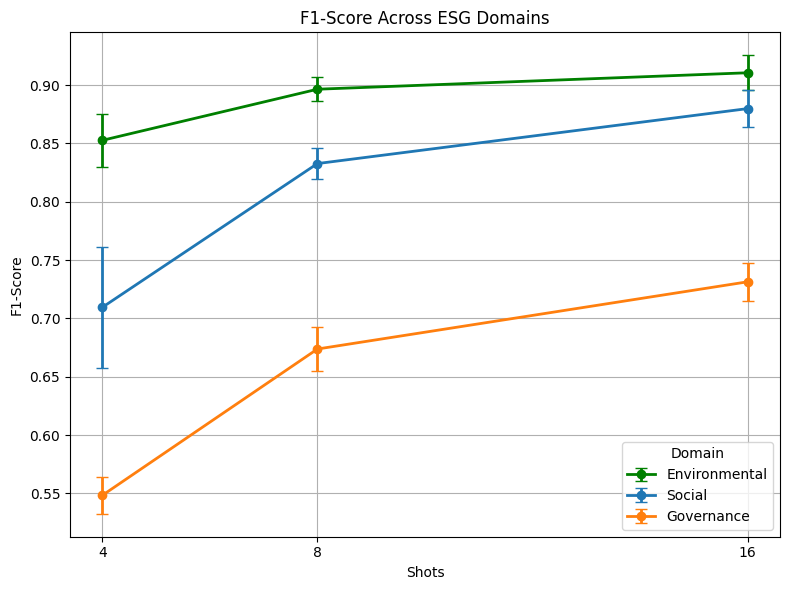

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Domain': ['Environmental']*3 + ['Social']*3 + ['Governance']*3,
    'Shots': [4, 8, 16]*3,
    'F1': [0.8526, 0.8964, 0.9105, 0.7095, 0.8327, 0.8798, 0.5484, 0.6738, 0.7314],
    'F1_std': [0.0229, 0.0105, 0.0150, 0.0519, 0.0134, 0.0160, 0.0158, 0.0187, 0.0162],
}

df = pd.DataFrame(data)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

for domain in df['Domain'].unique():
    domain_df = df[df['Domain'] == domain]
    ax.errorbar(
        domain_df['Shots'],
        domain_df['F1'],
        yerr=domain_df['F1_std'],
        label=domain,
        marker='o',
        capsize=4,
        linewidth=2,
        color='green' if domain == 'Environmental' else None
    )

# Axis formatting
ax.set_xlabel('Shots')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score Across ESG Domains')
ax.set_xticks([4, 8, 16])
ax.legend(title='Domain')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Environmental
base_E_llm = pd.read_csv("../data/llm_labeled/base_data_E_llm.csv")
env_E_llm = pd.read_csv("../data/llm_labeled/env_data_llm.csv")
base_E_pseudo = pd.read_csv("../data/pseudo_labeled/base_data_E_pseudo.csv")
env_E_pseudo = pd.read_csv("../data/pseudo_labeled/env_data_pseudo.csv")

# Social
base_S_llm = pd.read_csv("../data/llm_labeled/base_data_S_llm.csv")
soc_S_llm = pd.read_csv("../data/llm_labeled/soc_data_llm.csv")
base_S_pseudo = pd.read_csv("../data/pseudo_labeled/base_data_S_pseudo.csv")
soc_S_pseudo = pd.read_csv("../data/pseudo_labeled/soc_data_pseudo.csv")

# Governance
base_G_llm = pd.read_csv("../data/llm_labeled/base_data_G_llm.csv")
gov_G_llm = pd.read_csv("../data/llm_labeled/gov_data_llm.csv")
base_G_pseudo = pd.read_csv("../data/pseudo_labeled/base_data_G_pseudo.csv")
gov_G_pseudo = pd.read_csv("../data/pseudo_labeled/gov_data_pseudo.csv")

In [22]:
import pandas as pd
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Enable inline plots
%matplotlib inline


In [23]:
def label_agreement_analysis(llm_df, pseudo_df, name="", text_col="text", label_col="label"):
    # Merge on the text column
    merged = pd.merge(
        llm_df[[text_col, label_col]].rename(columns={label_col: "llm_label"}),
        pseudo_df[[text_col, label_col]].rename(columns={label_col: "pseudo_label"}),
        on=text_col,
        how="inner"
    )

    # Drop rows with NaN labels
    before_drop = len(merged)
    merged = merged.dropna(subset=["llm_label", "pseudo_label"])
    dropped = before_drop - len(merged)

    if merged.empty:
        print(f"⚠️ No matching labeled texts found for {name}")
        return

    if dropped > 0:
        print(f"ℹ️ Dropped {dropped} rows with NaN labels in {name}")

    llm_labels = merged["llm_label"]
    pseudo_labels = merged["pseudo_label"]

    from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    acc = accuracy_score(llm_labels, pseudo_labels)
    kappa = cohen_kappa_score(llm_labels, pseudo_labels)

    all_labels = sorted(set(llm_labels) | set(pseudo_labels))
    cm = confusion_matrix(llm_labels, pseudo_labels, labels=all_labels)
    cm_df = pd.DataFrame(cm,
                         index=[f"LLM: {label}" for label in all_labels],
                         columns=[f"Pseudo: {label}" for label in all_labels])

    print(f"=== {name} ===")
    print(f"Matched rows (after drop): {len(merged)}")
    print(f"Label Agreement Accuracy: {acc:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    display(cm_df)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Pseudo Labels")
    plt.ylabel("LLM Labels")
    plt.tight_layout()
    plt.show()


ℹ️ Dropped 48 rows with NaN labels in Base - Environmental
=== Base - Environmental ===
Matched rows (after drop): 9686
Label Agreement Accuracy: 0.8995
Cohen's Kappa: 0.4985


Pseudo: 0.0  Pseudo: 1.0
LLM: 0.0         8135          955
LLM: 1.0           18          578

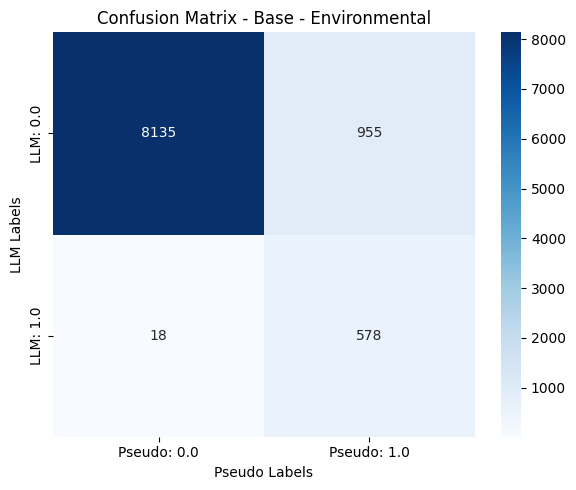

ℹ️ Dropped 122 rows with NaN labels in Env - Environmental
=== Env - Environmental ===
Matched rows (after drop): 6616
Label Agreement Accuracy: 0.7344
Cohen's Kappa: 0.4415


Pseudo: 0.0  Pseudo: 1.0
LLM: 0.0         1320         1712
LLM: 1.0           45         3539

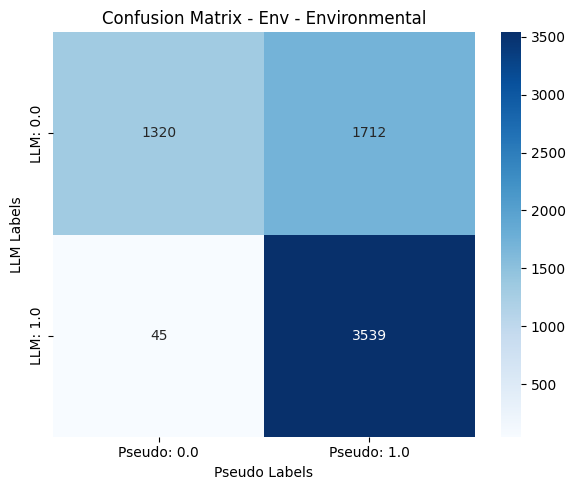

In [24]:
# Environmental
label_agreement_analysis(base_E_llm, base_E_pseudo, name="Base - Environmental", text_col="text", label_col="env")
label_agreement_analysis(env_E_llm, env_E_pseudo, name="Env - Environmental", text_col="text", label_col="env")




ℹ️ Dropped 209 rows with NaN labels in Base - Social
=== Base - Social ===
Matched rows (after drop): 9412
Label Agreement Accuracy: 0.9102
Cohen's Kappa: 0.6807


Pseudo: 0.0  Pseudo: 1.0
LLM: 0.0         7402          239
LLM: 1.0          606         1165

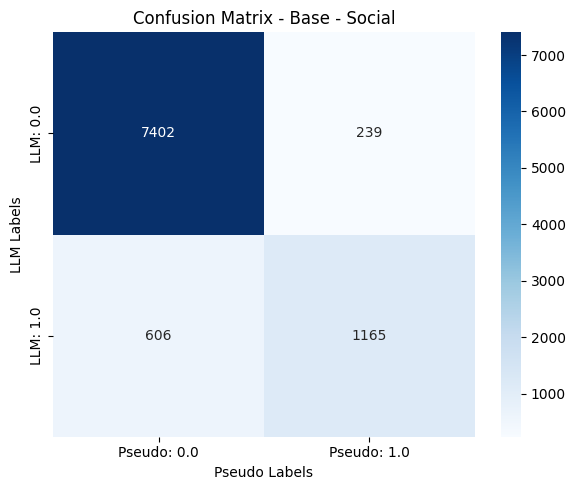

ℹ️ Dropped 145 rows with NaN labels in Soc - Social
=== Soc - Social ===
Matched rows (after drop): 6601
Label Agreement Accuracy: 0.8999
Cohen's Kappa: 0.6623


Pseudo: 0.0  Pseudo: 1.0
LLM: 0.0         5081          179
LLM: 1.0          482          859

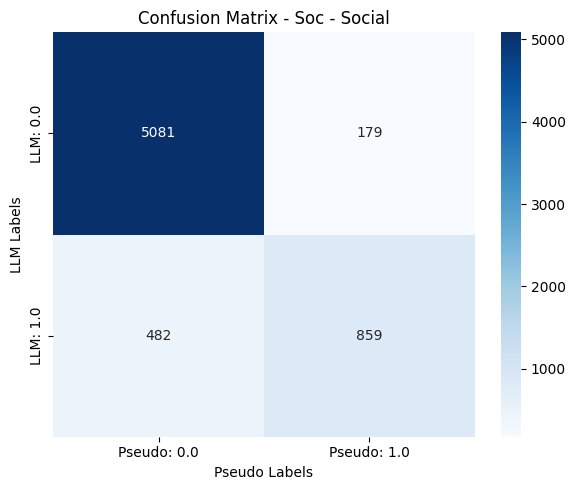

ℹ️ Dropped 99 rows with NaN labels in Base - Governance
=== Base - Governance ===
Matched rows (after drop): 9082
Label Agreement Accuracy: 0.8140
Cohen's Kappa: 0.3221


Pseudo: 0.0  Pseudo: 1.0
LLM: 0.0         6858           15
LLM: 1.0         1674          535

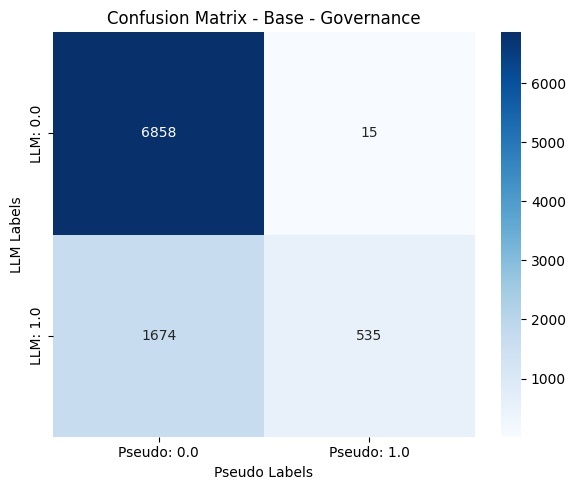

ℹ️ Dropped 145 rows with NaN labels in Gov - Governance
=== Gov - Governance ===
Matched rows (after drop): 5500
Label Agreement Accuracy: 0.6422
Cohen's Kappa: 0.3589


Pseudo: 0.0  Pseudo: 1.0
LLM: 0.0         1484            5
LLM: 1.0         1963         2048

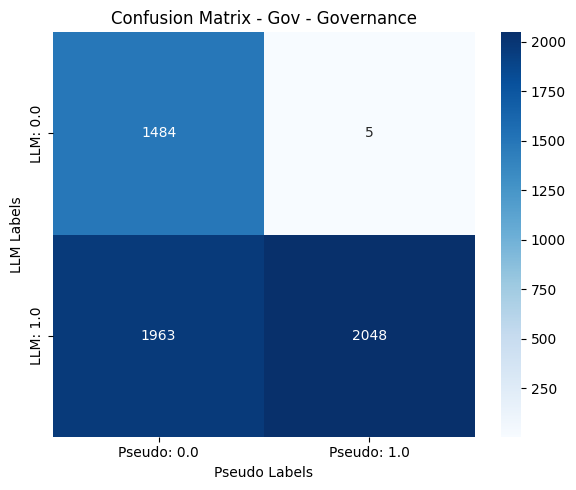

In [25]:
# Social
label_agreement_analysis(base_S_llm, base_S_pseudo, name="Base - Social", text_col="text", label_col="soc")
label_agreement_analysis(soc_S_llm, soc_S_pseudo, name="Soc - Social", text_col="text", label_col="soc")

# Governance
label_agreement_analysis(base_G_llm, base_G_pseudo, name="Base - Governance", text_col="text", label_col="gov")
label_agreement_analysis(gov_G_llm, gov_G_pseudo, name="Gov - Governance", text_col="text", label_col="gov")

In [26]:
print("LLM columns:", base_E_llm.columns.tolist())
print("Pseudo columns:", base_E_pseudo.columns.tolist())


LLM columns: ['text', 'env']
Pseudo columns: ['text', 'env']


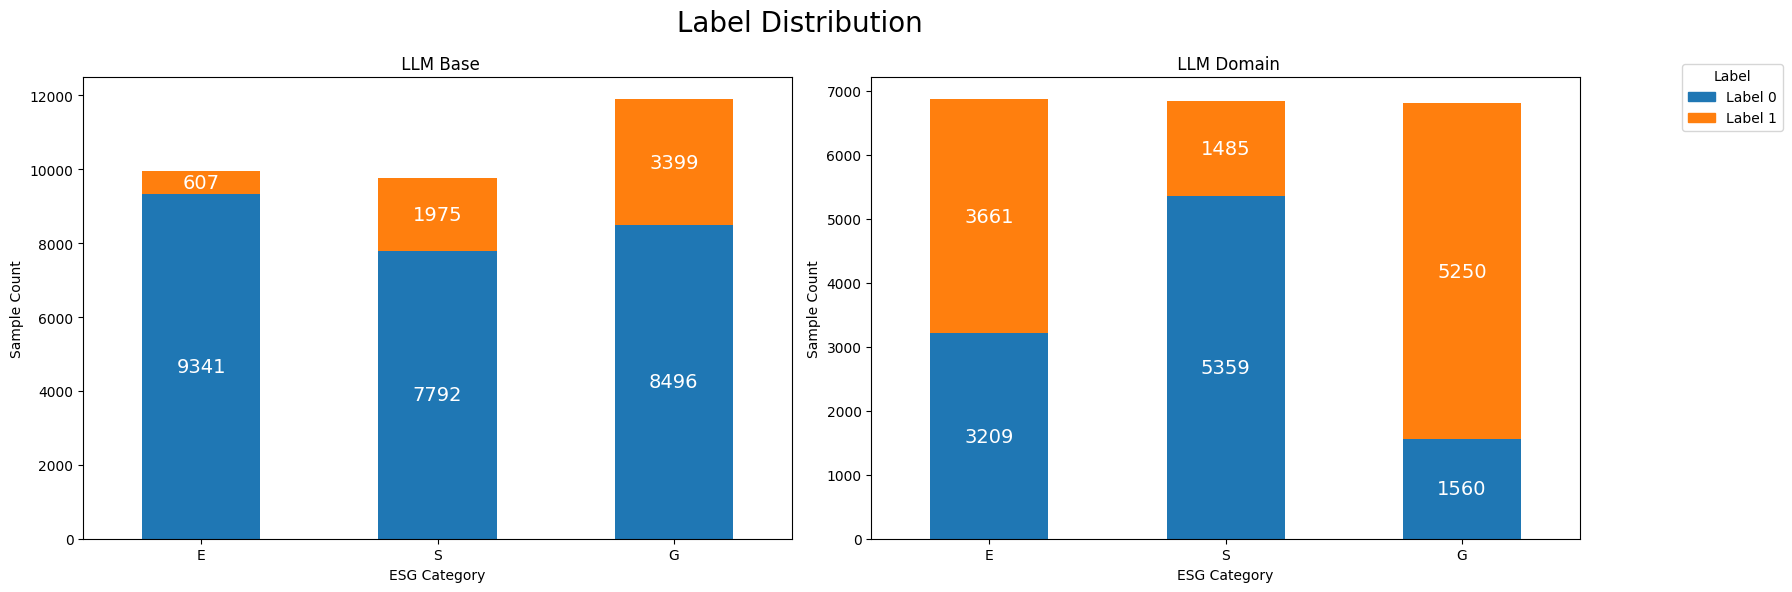

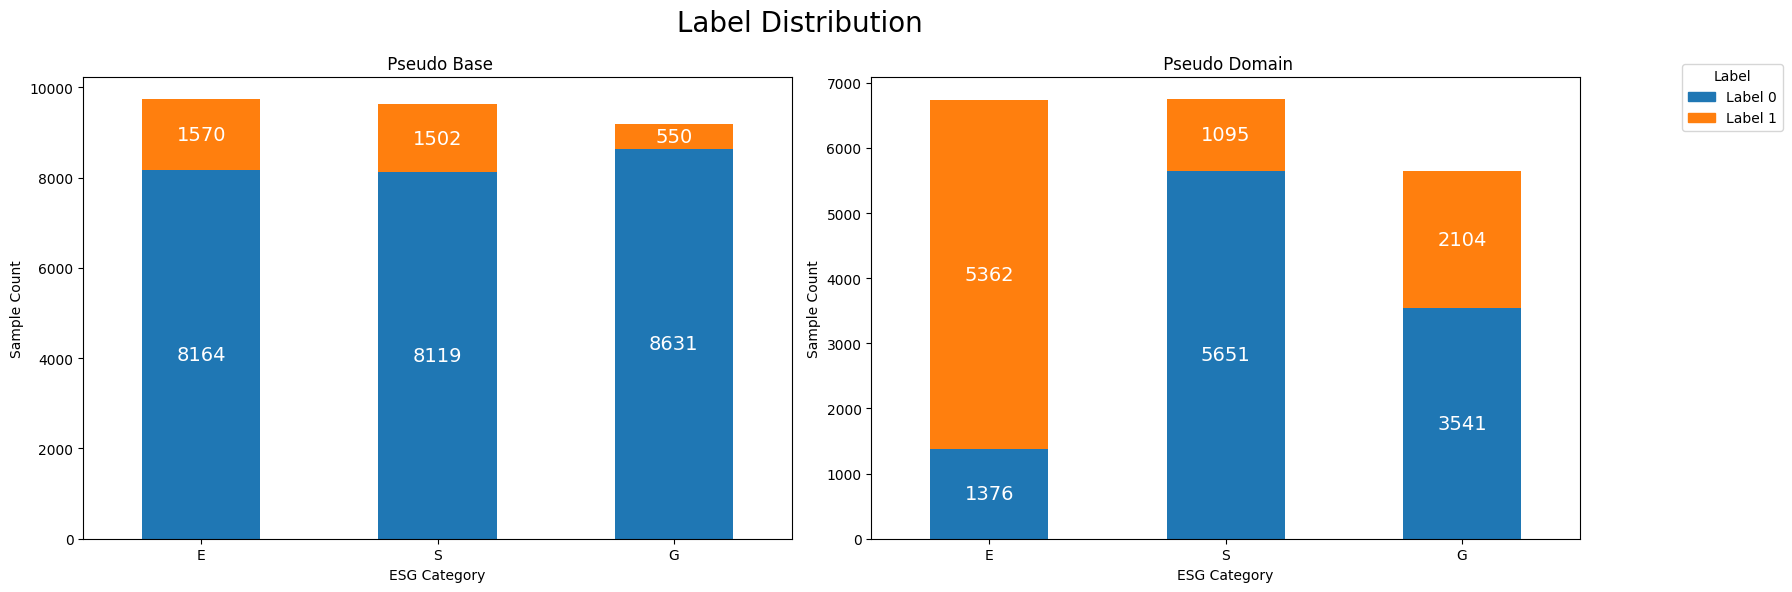

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
llm_groups = {
    "LLM Base": {
        "E": ("../data/llm_labeled/base_data_E_llm.csv", "env"),
        "S": ("../data/llm_labeled/base_data_S_llm.csv", "soc"),
        "G": ("../data/llm_labeled/base_data_G_llm.csv", "gov"),
    },
    "LLM Domain": {
        "E": ("../data/llm_labeled/env_data_llm.csv", "env"),
        "S": ("../data/llm_labeled/soc_data_llm.csv", "soc"),
        "G": ("../data/llm_labeled/gov_data_llm.csv", "gov"),
    }
}

pseudo_groups = {
    "Pseudo Base": {
        "E": ("../data/pseudo_labeled/base_data_E_pseudo.csv", "env"),
        "S": ("../data/pseudo_labeled/base_data_S_pseudo.csv", "soc"),
        "G": ("../data/pseudo_labeled/base_data_G_pseudo.csv", "gov"),
    },
    "Pseudo Domain": {
        "E": ("../data/pseudo_labeled/env_data_pseudo.csv", "env"),
        "S": ("../data/pseudo_labeled/soc_data_pseudo.csv", "soc"),
        "G": ("../data/pseudo_labeled/gov_data_pseudo.csv", "gov"),
    }
}

colors = {0: "#1f77b4", 1: "#ff7f0e"}

def plot_group(group_dict, title_prefix):
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    axes = axes.flatten()

    for idx, (group_name, files) in enumerate(group_dict.items()):
        ax = axes[idx]
        group_df = pd.DataFrame()

        for domain, (path, label_col) in files.items():
            df = pd.read_csv(path)
            counts = df[label_col].value_counts().rename(domain)
            group_df = pd.concat([group_df, counts], axis=1)

        group_df = group_df.fillna(0).T
        group_df = group_df[[col for col in sorted(group_df.columns)]]

        group_df.plot(
            kind='bar',
            stacked=True,
            ax=ax,
            color=[colors[col] for col in group_df.columns],
            legend=False
        )

        for i, (index, row) in enumerate(group_df.iterrows()):
            cumulative = 0
            for label in group_df.columns:
                value = row[label]
                if value > 0:
                    ax.text(i, cumulative + value / 2, int(value), ha='center', va='center', fontsize=14, color='white')
                    cumulative += value

        ax.set_title(f"{title_prefix} {group_name}")
        ax.set_ylabel("Sample Count")
        ax.set_xlabel("ESG Category")
        ax.set_xticklabels(group_df.index, rotation=0)

    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[l]) for l in colors]
    labels = [f"Label {l}" for l in colors]
    fig.legend(handles, labels, title="Label", bbox_to_anchor=(1.05, 0.9), loc='upper left')
    fig.suptitle(f"{title_prefix} Label Distribution", fontsize=20)
    plt.tight_layout()
    plt.show()

# Plot both sets
plot_group(llm_groups, title_prefix="")
plot_group(pseudo_groups, title_prefix="")


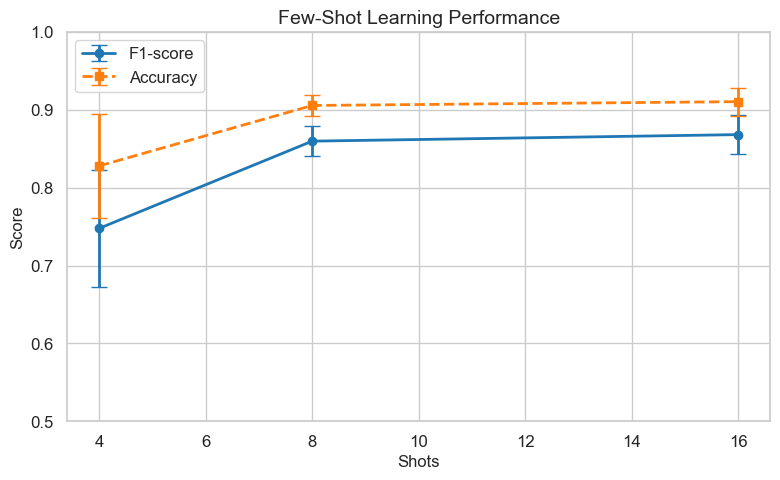

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn style
sns.set(style="whitegrid", font_scale=1.1)

# Input data
data = {
    "shots": [4]*5 + [8]*5 + [16]*5,
    "seed": list(range(1, 6)) * 3,
    "f1_score": [
        0.733396, 0.639159, 0.741082, 0.779359, 0.845438,
        0.833955, 0.848256, 0.876579, 0.860640, 0.879279,
        0.864721, 0.882692, 0.903104, 0.845815, 0.844305
    ],
    "accuracy": [
        0.820980, 0.719849, 0.858668, 0.844221, 0.895729,
        0.887626, 0.898359, 0.919823, 0.906566, 0.915404,
        0.902423, 0.922194, 0.934311, 0.888393, 0.904974
    ]
}
df = pd.DataFrame(data)

summary = df.groupby("shots").agg({
    "f1_score": ["mean", "std"],
    "accuracy": ["mean", "std"]
}).reset_index()
summary.columns = ["shots", "f1_mean", "f1_std", "acc_mean", "acc_std"]

fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(summary["shots"], summary["f1_mean"], yerr=summary["f1_std"],
            fmt='o-', capsize=6, color="#1f77b4", linewidth=2, label="F1-score")

ax.errorbar(summary["shots"], summary["acc_mean"], yerr=summary["acc_std"],
            fmt='s--', capsize=6, color="#FF7F0E", linewidth=2, label="Accuracy")

ax.set_title("Few-Shot Learning Performance", fontsize=14)
ax.set_xlabel("Shots", fontsize=12)
ax.set_ylabel("Score", fontsize=12)
ax.set_ylim(0.5, 1.0)
ax.grid(True)
ax.legend(fontsize=12)

plt.tight_layout()
plt.show()


🧾 Collected data:


run_name  batch_size  max_memory_mb
0          unique-sweep-1          16    5167.482368
1          sweepy-sweep-8          16    5194.483200
2          devout-sweep-7          16    5183.991296
3          likely-sweep-6          16    5198.284288
4         earnest-sweep-9          16    5190.682112
5          copper-sweep-4          16    5199.195648
6   misunderstood-sweep-3          16    5188.060672
7       dauntless-sweep-2          16    5193.041408
8           clear-sweep-5          16    5189.109248
9        glowing-sweep-17          32    8601.044480
10        wobbly-sweep-10          32    8606.549504
11        winter-sweep-11          32    8599.864832
12         sweet-sweep-12          32    8606.156288
13        decent-sweep-13          32    8606.942720
14       ancient-sweep-14          32    8603.403776
15        expert-sweep-15          32    8603.403776
16         comfy-sweep-16          32    8606.287360
17          rich-sweep-18          32    8605.238784

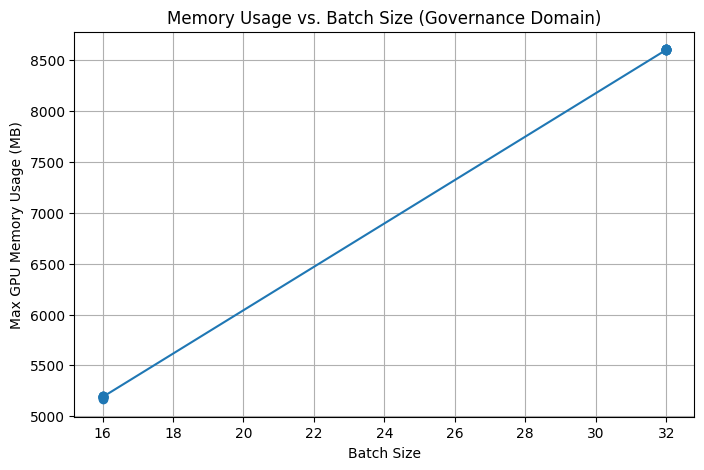

In [ ]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt

entity = "mastersveenpan"
project = "Governance"
sweep_id = "gt7y9dn6"

api = wandb.Api()
runs = api.runs(f"{entity}/{project}")

records = []

for run in runs:
    try:
        if run.sweep and run.sweep.id == sweep_id:
            config = run.config
            history = run.history(keys=["gpu_memory_mb"], pandas=True)

            if not history.empty and "gpu_memory_mb" in history:
                max_memory = history["gpu_memory_mb"].max()
                batch_size = config.get("batch_size", None)
                if batch_size is not None:
                    records.append({
                        "run_name": run.name,
                        "batch_size": batch_size,
                        "max_memory_mb": max_memory
                    })
    except Exception as e:
        print(f"⚠️ Skipping run {run.name}: {e}")

# Create DataFrame
df = pd.DataFrame(records)
df = df.sort_values("batch_size")
df.reset_index(drop=True, inplace=True)

# Show the data
print("🧾 Collected data:")
display(df)

# Optional: Save to CSV
df.to_csv("memory_vs_batchsize.csv", index=False)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df["batch_size"], df["max_memory_mb"], marker='o')
plt.xlabel("Batch Size")
plt.ylabel("Max GPU Memory Usage (MB)")
plt.title("Memory Usage vs. Batch Size (Governance Domain)")
plt.grid(True)
plt.show()
